# Non sono solo cartoni...
Il mondo dell'animazione non è solo fatto di colori vivaci e personaggi immaginari, ma anche di un'imponente produzione artistica e culturale che ha avuto un impatto significativo nell'industria cinematografica. Attraverso questo studio, esploreremo come i film di animazione, come Toy Story e altri vincitori di premi prestigiosi, abbiano influenzato la storia del cinema. Esamineremo dati riguardanti la produzione, le recensioni, i premi e l'evoluzione del genere, dimostrando che l'animazione è molto più di un semplice intrattenimento per bambini. In questo viaggio, scopriremo come questi film abbiano definito nuovi standard artistici, tecnici ed economici, spingendo i confini del possibile e lasciando un segno indelebile nella cultura popolare.

Prima di ogni cosa, importiamo le tabelle che dovremmo usare per il nostro lavoro di analisi.

In [16]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import seaborn as sns
from PIL import Image
from io import BytesIO
from IPython.display import display

# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))

File pronti per essere analizzati!


### Un po' di contesto...

Il cinema di animazione ha una storia affascinante e in continua evoluzione, nata dalla sperimentazione artistica e tecnologica e divenuta un pilastro fondamentale dell’intrattenimento globale. Con l'avvento del sonoro e del colore, il settore ha visto l'ascesa di Walt Disney, che con Steamboat Willie (1928) e poi con Biancaneve e i sette nani (1937) ha rivoluzionato l'industria, trasformando l’animazione in una forma d’arte popolare e accessibile a tutti.

Parallelamente, studi come Warner Bros., con i Looney Tunes di Tex Avery e Chuck Jones, hanno introdotto un'animazione più dinamica e comica, mentre in Giappone Osamu Tezuka ha gettato le basi per l'animazione giapponese moderna, influenzando i futuri capolavori dello Studio Ghibli di Hayao Miyazaki e Isao Takahata. L’animazione stop-motion ha visto maestri come Ray Harryhausen e, più recentemente, la Aardman Animations con Wallace & Gromit.

Con l’avvento del digitale, Pixar ha rivoluzionato il settore con Toy Story (1995), il primo lungometraggio interamente in CGI, aprendo la strada a nuove possibilità espressive. Oggi il cinema di animazione è una realtà multiforme e globale, che spazia dalla sperimentazione indipendente ai blockbuster targati Disney, DreamWorks e anime giapponesi, continuando a stupire e a innovare il linguaggio cinematografico. 

Vediamo assieme i grandi protagonisti di questo genere con un grafico indicativo delle vittorie agli Oscar, più ambito premio cinematografico, delle grandi case di produzione animata per i loro capolavori:

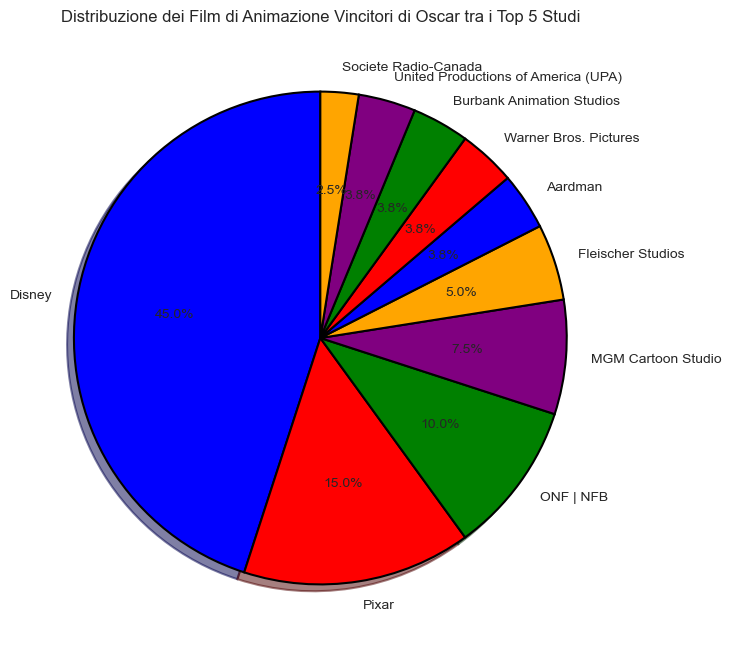

In [17]:
# Filtrare i film vincitori di Oscar
oscar_winners = oscar_awards[oscar_awards["winner"] == True]

# Unire i dati per ottenere i generi e gli studi di produzione
merged_df = oscar_winners.merge(movies, left_on="film", right_on="name", how="inner")
merged_df = merged_df.merge(genres, left_on="id", right_on="id", how="inner")
merged_df = merged_df.merge(studios, left_on="id", right_on="id", how="inner")

# Filtrare solo i film di animazione
animation_winners = merged_df[merged_df["genre"].str.lower() == "animation"]

# Rimuovere duplicati per evitare conteggi doppi nelle coproduzioni
animation_winners = animation_winners.drop_duplicates(subset=["film"])

# Normalizzare i nomi degli studi per accorpare quelli contenenti "Disney"
animation_winners["studio"] = animation_winners["studio"].apply(lambda x: "Disney" if "disney" in str(x).lower() else x)

# Contare il numero di film vincitori per studio
studio_counts = animation_winners.groupby("studio")["film"].nunique().reset_index()
studio_counts = studio_counts.sort_values(by="film", ascending=False)

# Prendere i primi 5 studi
top_5_studios = studio_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_5_studios["film"], labels=top_5_studios["studio"], autopct='%1.1f%%', 
        colors=['blue', 'red', 'green', 'purple', 'orange'], startangle=90, shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title("Distribuzione dei Film di Animazione Vincitori di Oscar tra i Top 5 Studi")
plt.show()


Al contrario di quanto si possa pensare, per quanto sia un settore di nicchia, non è relegato al solo mondo dell'intrattenimento infantile. A supporto della mia tesi ecco un dato interessante: la correlazione tra film di animazione e il genere cui appartengono, che visualizziamo di seguito.

Come si può notare infatti, per quanto il genere comico abbia uno strapotere non indifferente, sono sull'ordine delle migliaia le serie animate o film che toccano generi ben lontani da quelli che concernono i gusti dei bambini, con un particolare occhio a quella che è la situazione di Drama e Horror.

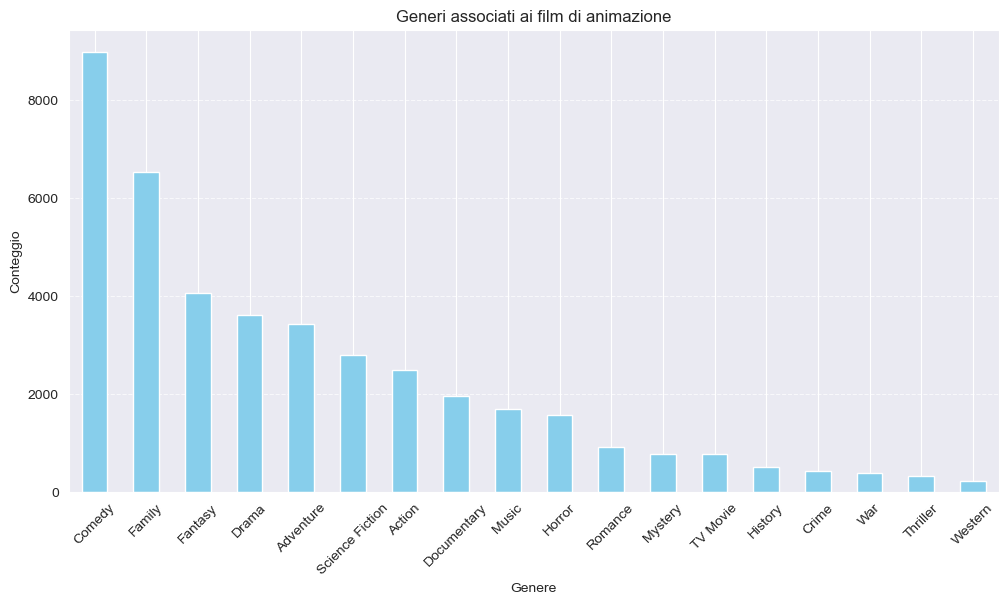

In [19]:
# Unire le tabelle per ottenere i film di animazione
animation_movies = genres[genres['genre'].str.lower() == 'animation']
merged = animation_movies.merge(movies, on='id')

# Contare la frequenza dei generi associati ai film di animazione (escludendo "Animation")
genre_counts = genres[genres['id'].isin(merged['id']) & (genres['genre'].str.lower() != 'animation')]['genre'].value_counts()

# Creare il grafico
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Generi associati ai film di animazione")
plt.xlabel("Genere")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Il paradiso Pixar (o l'inferno)
La Pixar Animation Studios è una delle case di produzione cinematografica più influenti della storia dell’animazione, nota per aver rivoluzionato il settore con l’introduzione della grafica computerizzata nei film d’animazione.

Le radici della Pixar affondano nel 1979, quando la divisione di grafica computerizzata della Lucasfilm, nota come Graphics Group, iniziò a sviluppare nuove tecnologie per la creazione di immagini digitali. Nel 1986, Steve Jobs acquistò questa divisione per 10 milioni di dollari, trasformandola in Pixar Inc. e guidandola verso il mondo dell’animazione digitale. Sotto la guida di Ed Catmull e John Lasseter, lo studio si dedicò alla creazione di cortometraggi sperimentali, tra cui Luxo Jr. (1986), il corto che introdusse la famosa lampada animata, diventata il simbolo della Pixar.

Nel 1995, dopo anni di sviluppo, la Pixar realizzò il primo lungometraggio interamente in CGI della storia: Toy Story. Il film, distribuito dalla Disney, fu un successo straordinario, sia dal punto di vista commerciale che critico, segnando l’inizio di una nuova era per l’animazione. Di seguito, la risposta del pubblico a questo film, che ancora oggi è molto apprezzato:

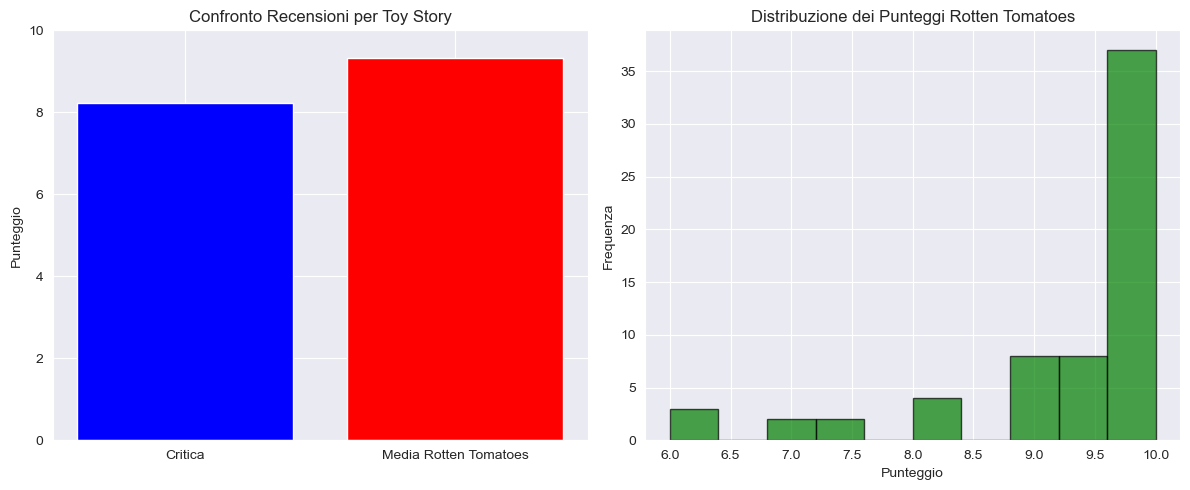

Rating critica per Toy Story: 8.24
Media recensioni Rotten Tomatoes per Toy Story: 9.31875


In [20]:
# Isolare il rating del film "Toy Story" dalla tabella movies
toy_story_rating = movies[movies["name"] == "Toy Story"]["rating"].values

# Isolare le recensioni di "Toy Story" dalla tabella rotten_tomatoes
toy_story_reviews = rotten_tomatoes[rotten_tomatoes["movie_title"] == "Toy Story"]["review_score"]

# Calcolare la media delle recensioni
toy_story_avg_review = toy_story_reviews.mean()

# Creare il grafico di confronto
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

labels = ["Critica", "Media Rotten Tomatoes"]
values = [toy_story_rating[0]*2 if len(toy_story_rating) > 0 else 0, toy_story_avg_review]

axes[0].bar(labels, values, color=['blue', 'red'])
axes[0].set_ylabel("Punteggio")
axes[0].set_title("Confronto Recensioni per Toy Story")
axes[0].set_ylim(0, 10)

# Creare il grafico della distribuzione delle recensioni Rotten Tomatoes
axes[1].hist(toy_story_reviews, bins=10, color='green', edgecolor='black', alpha=0.7)
axes[1].set_xlabel("Punteggio")
axes[1].set_ylabel("Frequenza")
axes[1].set_title("Distribuzione dei Punteggi Rotten Tomatoes")

plt.tight_layout()
plt.show()

# Stampare i risultati
print(f"Rating critica per Toy Story: {toy_story_rating[0]*2 if len(toy_story_rating) > 0 else 'N/A'}")
print(f"Media recensioni Rotten Tomatoes per Toy Story: {toy_story_avg_review}")

Non è un unicum nella storia della Pixar questa situazione: il numero di film con altissime recensioni su Rotten Tomatoes (ma anche con ottime valutazioni date dalla critica) è infatti grandissimo, come riportato di seguito. Inoltre evidenziamo i migliori dieci film per valutazioni del pubblico e i peggiori dieci, con particolare attenzione a questi ultimi.

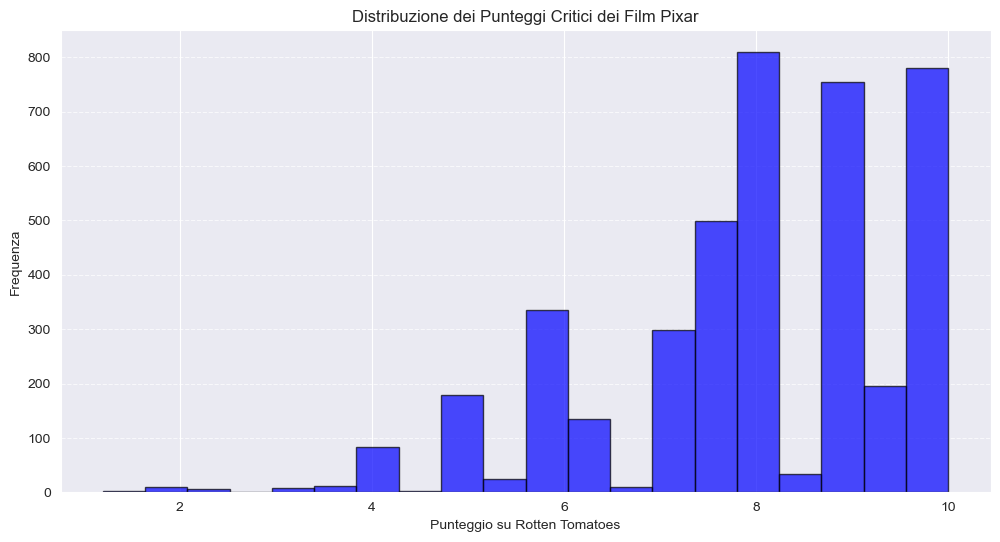

In [21]:
# Filtrare i film della Pixar
pixar_movies = movies.merge(studios, left_on="id", right_on="id", how="inner")
pixar_movies = pixar_movies[pixar_movies["studio"].str.contains("Pixar", case=False, na=False)]

# Assicurarsi che la colonna 'date' sia stringa prima di estrarre l'anno
pixar_movies["date"] = pixar_movies["date"].astype(str)
pixar_movies["year"] = pixar_movies["date"].str[:4].astype(int)

# Unire i dati con le valutazioni di Rotten Tomatoes
pixar_ratings = rotten_tomatoes.merge(pixar_movies, left_on="movie_title", right_on="name", how="inner")

# Calcolare il punteggio medio per ogni film
pixar_avg_ratings = pixar_ratings.groupby(['year', 'name'])['review_score'].mean().reset_index()

# Creare l'istogramma
plt.figure(figsize=(12, 6))
plt.hist(pixar_ratings['review_score'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Punteggio su Rotten Tomatoes")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi Critici dei Film Pixar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


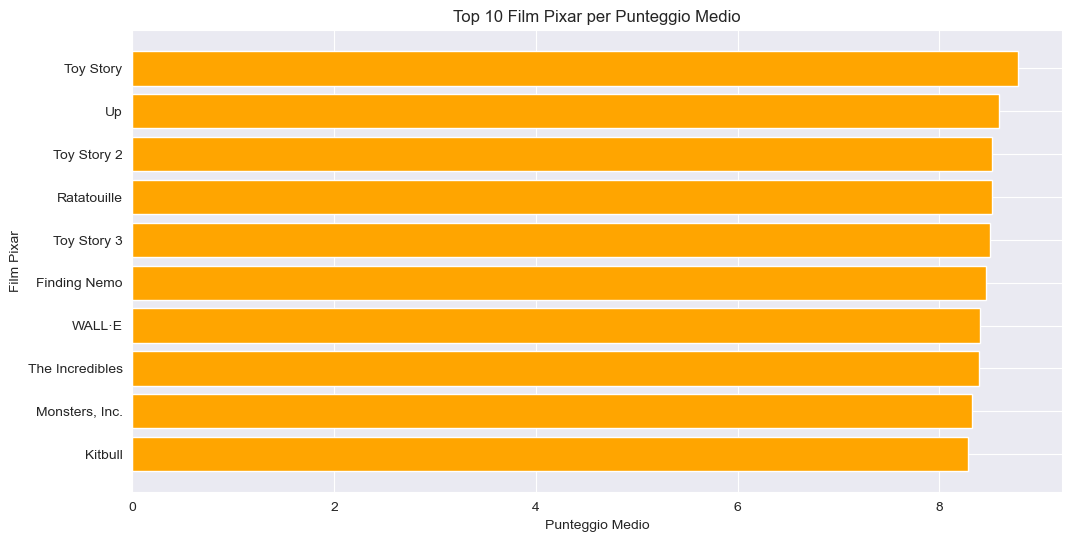

In [22]:
# Calcolare il punteggio medio su Rotten Tomatoes
rt_scores = rotten_tomatoes.groupby('movie_title')['review_score'].mean().reset_index()
rt_scores.rename(columns={'review_score': 'rt_avg_score'}, inplace=True)

# Normalizzare le scale dei punteggi
pixar_movies['rating'] = pixar_movies['rating'] * 2  # Portare la scala 1-5 a 1-10

# Unire i punteggi con i film Pixar
pixar_movies = pixar_movies.merge(rt_scores, left_on='name', right_on='movie_title', how='left')

# Calcolare la media tra il voto del film e il punteggio medio di Rotten Tomatoes
pixar_movies['combined_score'] = pixar_movies[['rating', 'rt_avg_score']].mean(axis=1, skipna=True)

# Ordinare per punteggio e mostrare i migliori
best_pixar_movies = pixar_movies[['name', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

# Creare il grafico dei migliori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(best_pixar_movies['name'], best_pixar_movies['combined_score'], color='orange')
plt.xlabel("Punteggio Medio")
plt.ylabel("Film Pixar")
plt.title("Top 10 Film Pixar per Punteggio Medio")
plt.gca().invert_yaxis()
plt.show()


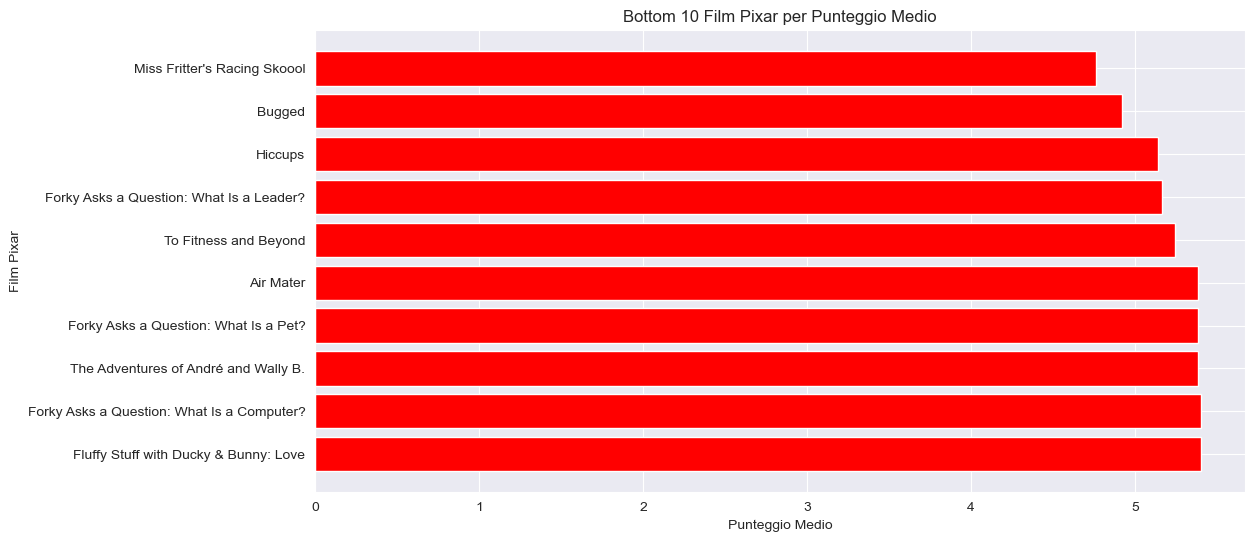

In [23]:
# Calcolare la media tra il voto del film e il punteggio medio di Rotten Tomatoes
pixar_movies['combined_score'] = pixar_movies[['rating', 'rt_avg_score']].mean(axis=1, skipna=True)

# Ordinare per punteggio e mostrare i peggiori
worst_pixar_movies = pixar_movies[['name', 'combined_score', 'minute']].sort_values(by='combined_score', ascending=True).head(10)

# Creare il grafico dei peggiori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(worst_pixar_movies['name'], worst_pixar_movies['combined_score'], color='red')
plt.xlabel("Punteggio Medio")
plt.ylabel("Film Pixar")
plt.title("Bottom 10 Film Pixar per Punteggio Medio")
plt.gca().invert_yaxis()
plt.show()

Arriviamo ora ai film peggiori, che sono accomuniti tutti quanti da un dato interessante: sono tutti quanti cortometraggi, ma un altro dato interessante riguarda la tipologia di film: per la maggior parte sono puntate spin-off di grandi classici ("Hiccups" lo è di "Cars") tutti creati per puro fan service, di conseguenza vanno ad intaccare meno la grande produzione della Pixar. Oltre a questo, importante è notare che le valutazioni non sono davvero molto negative, di conseguenza questo è un grande valore aggiunto.

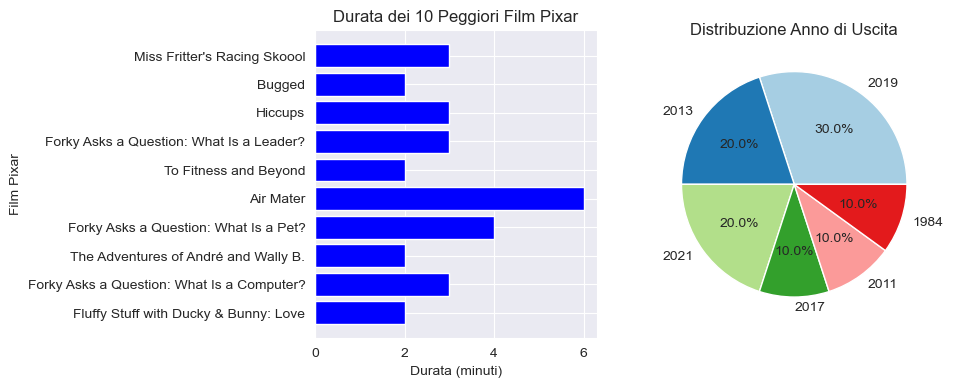

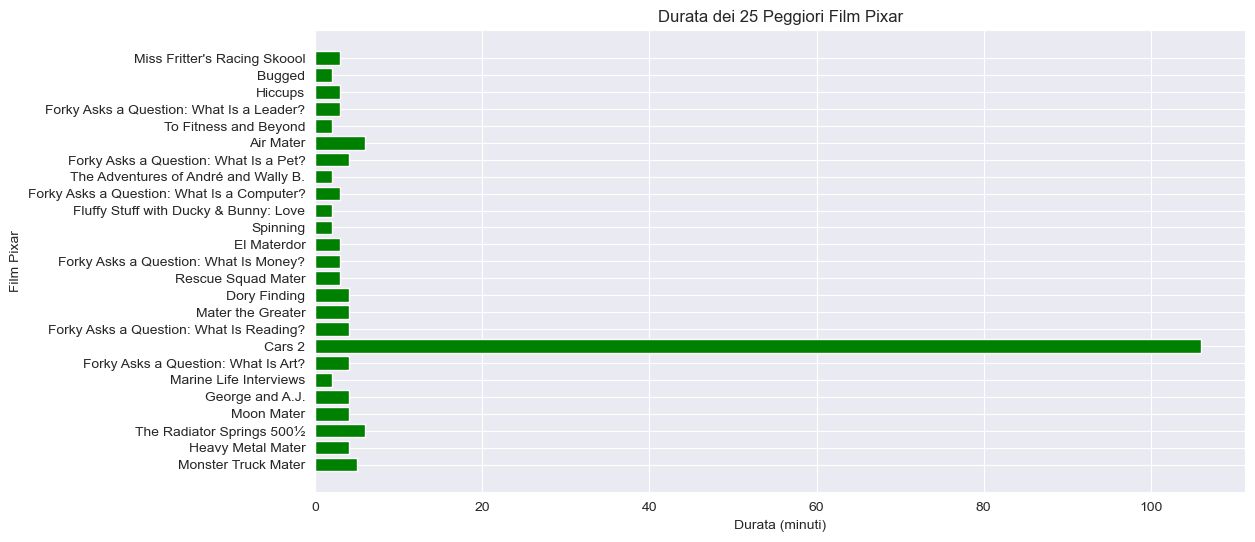

In [24]:
# Ordinare per punteggio e mostrare i peggiori
worst_pixar_movies_10 = pixar_movies[['name', 'combined_score', 'minute', 'date']].sort_values(by='combined_score', ascending=True).head(10)

worst_pixar_movies_25 = pixar_movies[['name', 'combined_score', 'minute', 'date']].sort_values(by='combined_score', ascending=True).head(25)

# Stampare i dati relativi all'anno di uscita
year_counts = worst_pixar_movies_10['date'].value_counts()

# Creare la figura con due sottografi affiancati
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Grafico a barre per la durata dei 10 peggiori film Pixar
axes[0].barh(worst_pixar_movies_10['name'], worst_pixar_movies_10['minute'], color='blue')
axes[0].set_xlabel("Durata (minuti)")
axes[0].set_ylabel("Film Pixar")
axes[0].set_title("Durata dei 10 Peggiori Film Pixar")
axes[0].invert_yaxis()  # Inverti l'asse y per leggibilità

# Grafico a torta per l'anno di uscita dei peggiori film Pixar
axes[1].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[1].set_title("Distribuzione Anno di Uscita")

# Creare il grafico per la durata dei peggiori film Pixar
plt.figure(figsize=(12, 6))
plt.barh(worst_pixar_movies_25['name'], worst_pixar_movies_25['minute'], color='green')
plt.xlabel("Durata (minuti)")
plt.ylabel("Film Pixar")
plt.title("Durata dei 25 Peggiori Film Pixar")
plt.gca().invert_yaxis()
plt.show()


Ma tutto questo successo da cosa nasce? La risposta è semplice: dall'approccio al mondo stesso dell'animazione. Infatti, mentre il mondo dell'animazione affrontava grandi cambiamenti, che hanno poi di fatto messo in crisi case enormi come Disney, Cartoon Networks e Dingo Pictures (poi fallita poco dopo), alla Pixar si creavano piste di macchinine a dimensione naturale per poter capire come girare meglio Cars, si assumevano chef stellati per provare cosa mettere nel menu di Ratatouille e tanto altro: insomma, si viaggiava su una navicella a parte. 

La Pixar era una macchina da guerra a sfondamento: non c'erano apparentemente problemi e onguno degli sviluppatori aveva il tempo di crescere e maturare dal punto di vista lavorativo per una strategia studiata davvero in maniera esemplare. Era tradizione infatti che prima di una grande uscita venisse fatto sviluppare allo stesso regista un cortometraggio preparatorio di quello che sarebbe venuto. Insomma, tutto costruito in maniera esemplare.

C'è un ma in questa apparentemente perfetta macchina da lavoro, un enorme ma: morto Jobs, il successore continuò il grande successo della casa di animazione in maniera praticamente impeccabile, se non fosse che nel 2018 tutte le donne che al tempo lavoravano lì denunciarono la situazione che erano costrette a sorbire: quell'apparente e perfetto paradiso di fatto non lo era per chi non era uomo. Continui abusi, discriminazioni e mancanza totale di rispetto nei confronti di quello che è il pensiero delle donne negli studios. Data la natura del progetto riguardante l'analisi dei dati, tengo a riportare questo di dato, a mio avviso importante anche per sensibilizzare sull'argomento e simili: al potere in Pixar nel 2018 c'erano 109 uomini cisgender bianchi, 11 di ogni altra opzione. Non è tutto oro ciò che luccica.
### La favola dell'antieroe: Disney e Shrek

Disney è uno dei colossi dell’intrattenimento animato mondiale, con un impatto significativo nel cinema, nella televisione e nel settore dello streaming. La sua influenza si estende ben oltre il semplice ambito cinematografico, plasmando l’immaginario collettivo di intere generazioni attraverso personaggi iconici, storie senza tempo e una strategia commerciale capace di rinnovarsi costantemente.

Non è certo difficile comprendere la grandezza di un brand di tale importanza: la Disney ha saputo mantenere il suo dominio nel settore dell’animazione per decenni, innovando il linguaggio visivo e narrativo e adattandosi alle trasformazioni del mercato globale. Il suo successo non si misura solo in termini di incassi al botteghino o vendite di merchandise, ma anche attraverso la sua capacità di penetrare culture e mercati diversi, raggiungendo un pubblico sempre più ampio e variegato.

Per dimostrare la presa mediatica che la Disney ha avuto nel cinema, riporto di seguito un grafico che rappresenta i primi cinquanta film per numero di traduzioni in altre lingue. Questo dato è particolarmente significativo perché evidenzia quanto i prodotti Disney siano riusciti a superare le barriere linguistiche e culturali, diventando veri e propri fenomeni globali.

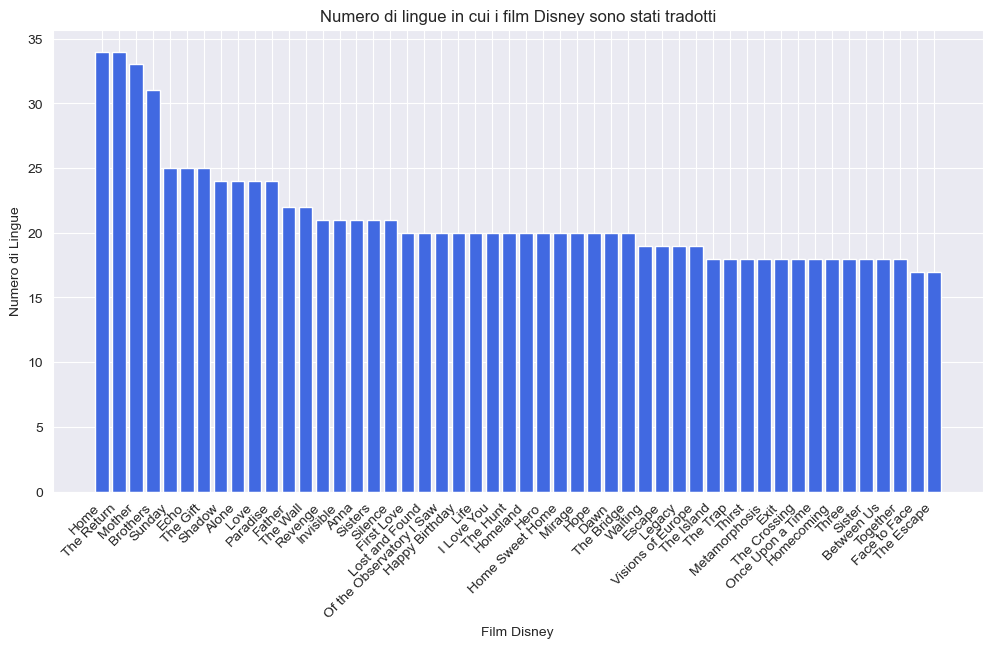

In [25]:
# Merge tra film e studios per identificare quelli prodotti dalla Disney
movies_studios = pd.merge(movies, studios, on="id", how="left")
movies_studios["studio"] = movies_studios["studio"].apply(lambda x: "Disney" if "disney" in str(x).lower() else x)

# Merge con il dataset delle lingue per contare il numero di lingue per ciascun film
disney_movies_languages = pd.merge(movies_studios, languages, on="id", how="left")
language_counts = disney_movies_languages.groupby("name")["language"].nunique().reset_index()

# Ordinamento e visualizzazione dei primi 10 risultati
language_counts = language_counts.sort_values(by="language", ascending=False).head(50)

# Creazione dell'istogramma
plt.figure(figsize=(12,6))
plt.bar(language_counts["name"], language_counts["language"], color='royalblue')
plt.xlabel("Film Disney")
plt.ylabel("Numero di Lingue")
plt.title("Numero di lingue in cui i film Disney sono stati tradotti")
plt.xticks(rotation=45, ha='right')
plt.show()

A differenza della Pixar, non siamo però qui per tessere lodi (non ce ne sarebbe bisogno): siamo qui per analizzare una situazione che la Disney è venuta a creare intorno agli anni 2000 e che ha causato la perdita di milioni di euro di incasso. 

Partiamo con una piccola analisi di premi vinti nel periodo compreso tra gli anni '50 e '90, anni di forte boom per il cinema e di inizio della nostra storia. Notiamo in maniera abbastanza evidente il calo a partire dalla morte di Walt Disney (1966), ma questo non ha toccato troppo l'egemonia del colosso, in quanto era difficile per una casa di produzione animata non chiudere dopo aver pubblicato due film. 

In [40]:
# Importare i moduli necessari
from matplotlib.animation import FuncAnimation

# Impostare il backend di matplotlib per Jupyter Notebook
%matplotlib notebook

# Merge tra film e studios per identificare quelli prodotti dalla Disney
movies_studios = pd.merge(movies, studios, on="id", how="left")
movies_studios["studio"] = movies_studios["studio"].apply(lambda x: "Disney" if "disney" in str(x).lower() else x)
disney_movies = movies_studios[movies_studios["studio"] == "Disney"]

# Filtrare i film Disney candidati e vincitori agli Oscar dal 2002 in poi
disney_oscar_awards = oscar_awards[(oscar_awards["film"].isin(disney_movies["name"])) & (oscar_awards["year_film"] >= 1966) & (oscar_awards["year_film"] <= 1987)]
oscar_counts = disney_oscar_awards.groupby("film")["winner"].agg(["count", "sum"]).reset_index()
oscar_counts.columns = ["Film", "Candidature", "Vittorie"]

# Filtrare i film Disney candidati e vincitori agli Oscar prima del 1960
disney_oscar_awards_old = oscar_awards[(oscar_awards["film"].isin(disney_movies["name"])) & (oscar_awards["year_film"] >= 1955) & (oscar_awards["year_film"] <= 1966)]
oscar_counts_old = disney_oscar_awards_old.groupby("film")["winner"].agg(["count", "sum"]).reset_index()
oscar_counts_old.columns = ["Film", "Candidature", "Vittorie"]

# Preparazione dei dati per l'animazione
oscar_counts_sorted = oscar_counts.sort_values("Film")
oscar_counts_old_sorted = oscar_counts_old.sort_values("Film")

def update(frame):
    # Periodo dal 2002 in poi
    ax[0].clear()
    ax[0].plot(oscar_counts_sorted.iloc[:frame]["Candidature"], marker='o', linestyle='-', color='blue', label="Candidature")
    ax[0].plot(oscar_counts_sorted.iloc[:frame]["Vittorie"], marker='s', linestyle='-', color='red', label="Vittorie")
    ax[0].set_xlabel("Film Disney", color="white")
    ax[0].set_ylabel("Numero di Oscar", color="white")
    ax[0].set_title("Candidature e vittorie agli Oscar (dal 1966 al 1987)", color="white")
    ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labelcolor="white")
    ax[0].tick_params(axis='y', labelcolor="white")
    ax[0].legend(fontsize=10, loc="upper left")
    ax[0].grid(True, linestyle='--', alpha=0.6)

    # Periodo prima del 1960
    ax[1].clear()
    ax[1].plot(oscar_counts_old_sorted.iloc[:frame]["Candidature"], marker='o', linestyle='-', color='blue', label="Candidature")
    ax[1].plot(oscar_counts_old_sorted.iloc[:frame]["Vittorie"], marker='s', linestyle='-', color='red', label="Vittorie")
    ax[1].set_xlabel("Film Disney", color="white")
    ax[1].set_title("Candidature e vittorie agli Oscar (dal 1950 al 1966)", color="white")
    ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labelcolor="white")
    ax[1].tick_params(axis='y', labelcolor="white")
    ax[1].legend(fontsize=10, loc="upper left")
    ax[1].grid(True, linestyle='--', alpha=0.6)


# Creazione del grafico e della animazione
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=max(len(oscar_counts), len(oscar_counts_old)), interval=500, repeat=False)

# Visualizzare l'animazione
plt.tight_layout()

ani

# Chiama plt.show() per visualizzare l'animazione
plt.show()


<IPython.core.display.Javascript object>

Per scoprire il motivo del calo dobbiamo andare dalla parte opposta del globo rispetto alla sede dei Disney Studios: il Giappone infatti stava osservando la situazione e si era inserita nel mercato occidentale portando una grandissima quantità di film e cartoni animati che costavano pochissimo in quanto molte volte semplici adattamenti colorati ai loro fumetti. A sostegno di ciò ecco il grafico sulle uscite delle 20 più grandi case di produzione giapponesi di anime o film animati, con allegate foto che mostrano anche di come i fumetti venissero propriamente copiati per essere resi animati attraverso le locandine delle sale cinematografiche.

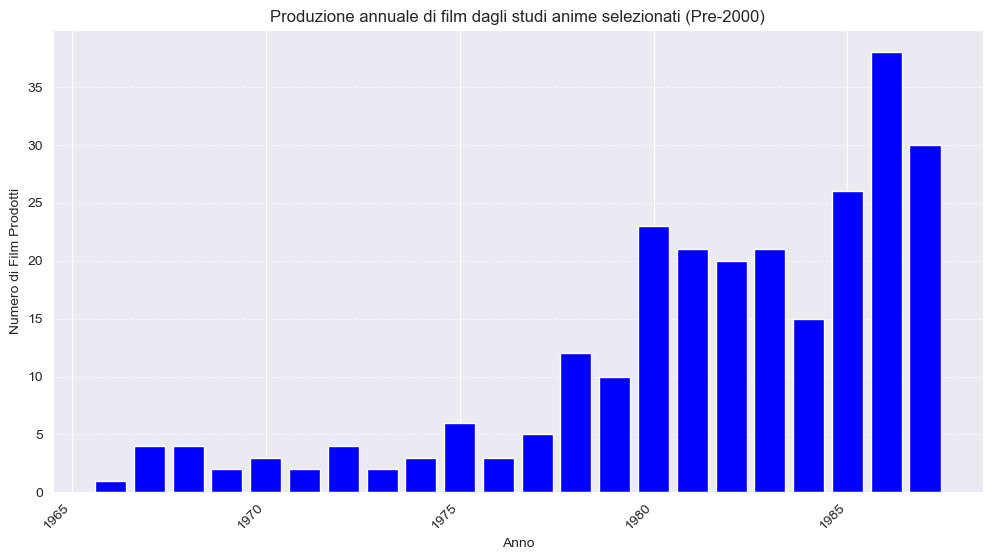

In [26]:
# Lista degli studi di animazione giapponesi da analizzare
anime_studios = [
    "Ghibli", "MAPPA", "Bones", "Toei Animation", "Ufotable", "Pierrot", "SILVER LINK", 
    "Khara", "Trigger", "Madhouse", "Sunrise", "Production I.G", "Wit Studio", "The pokemon company"
]

# Merge tra film e studios
movies_studios = movies.merge(studios, on="id", how="left")

# Filtrare i film prodotti dagli studi anime
filtered_movies = movies_studios[movies_studios["studio"].astype(str).str.lower().isin([s.lower() for s in anime_studios])]

# Estrarre gli anni e filtrare per film prima del 2000
filtered_movies = filtered_movies.dropna(subset=["date"])
filtered_movies = filtered_movies[(filtered_movies["date"] >= 1966) & ((filtered_movies["date"] < 1988))]

# Contare il numero di produzioni per anno
anime_productions_per_year = filtered_movies["date"].value_counts().sort_index()

# Creazione dell'istogramma
plt.figure(figsize=(12,6))
plt.bar(anime_productions_per_year.index, anime_productions_per_year.values, color='blue')
plt.xlabel("Anno")
plt.ylabel("Numero di Film Prodotti")
plt.title("Produzione annuale di film dagli studi anime selezionati (Pre-2000)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Il confronto si accende nel 1988, quando vengono annunciati due film, Akira e Chi ha incastrato Roger Rabbit?, uno per fazione. Lo scopo era chiaro: delineare il campione del mondo dell'animazione. Di seguito riportiamo il dato sulle candidature e le vittorie dei due film agli Oscar, che dimostrano come da questo scontro uscirà vincitrice la Disney: il film sul coniglio guadagnò abbastanza da far vivere di rendita per qualche anno, consentendo al suo regista (Katzenberg) di concentrarsi su altri film, come Il Re Leone o La Sirenetta. Akira non sarà un flop, anzi: segnerà una svolta per l'animazione giapponese e verrà molto apprezzato anche da critica e pubblico, come possiamo vedere nel prossimo grafico

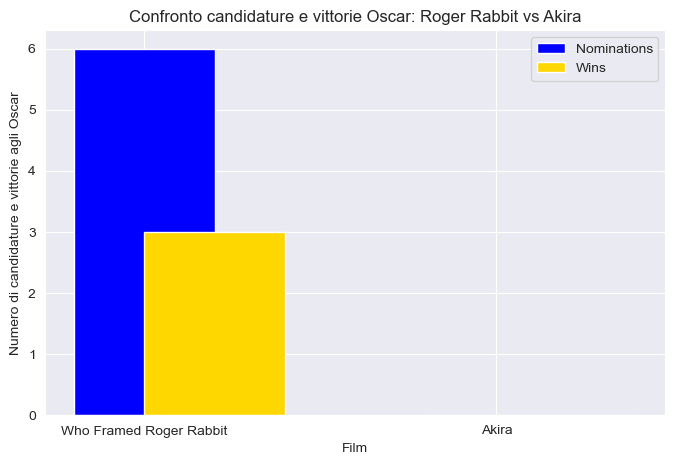

In [27]:
# Selezione dei film da confrontare
film1 = "Who Framed Roger Rabbit"
film2 = "Akira"

# Filtriamo le candidature per i due film
df_film1 = oscar_awards[oscar_awards["film"].str.contains(film1, case=False, na=False)]
df_film2 = oscar_awards[oscar_awards["film"].str.contains(film2, case=False, na=False)]

# Contiamo le candidature
nominations_film1 = len(df_film1)
nominations_film2 = len(df_film2)

# Contiamo le vittorie
wins_film1 = len(df_film1[df_film1["winner"] == True])
wins_film2 = len(df_film2[df_film2["winner"] == True])

# Creazione del grafico
films = [film1, film2]
nominations = [nominations_film1, nominations_film2]
wins = [wins_film1, wins_film2]

x = range(len(films))

plt.figure(figsize=(8, 5))
plt.bar(x, nominations, width=0.4, label="Nominations", color="blue", align='center')
plt.bar(x, wins, width=0.4, label="Wins", color="gold", align='edge')
plt.xlabel("Film")
plt.ylabel("Numero di candidature e vittorie agli Oscar")
plt.xticks(x, films)
plt.legend()
plt.title("Confronto candidature e vittorie Oscar: Roger Rabbit vs Akira")
plt.show()

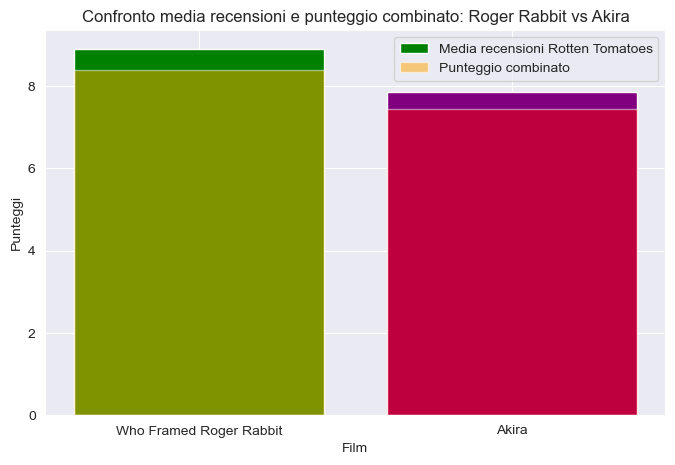

In [28]:
# Filtriamo le recensioni per i due film
df_reviews_film1 = rotten_tomatoes[rotten_tomatoes["movie_title"].str.contains(film1, case=False, na=False)]
df_reviews_film2 = rotten_tomatoes[rotten_tomatoes["movie_title"].str.contains(film2, case=False, na=False)]

# Calcoliamo la media delle recensioni
mean_review_film1 = df_reviews_film1["review_score"].mean()
mean_review_film2 = df_reviews_film2["review_score"].mean()

# Normalizziamo il punteggio del film dalla tabella movies (rating su scala 1-10)
movies["rating"] = movies["rating"] * 2
rating_film1 = movies[movies["name"].str.contains(film1, case=False, na=False)]["rating"].mean()
rating_film2 = movies[movies["name"].str.contains(film2, case=False, na=False)]["rating"].mean()

# Calcoliamo il punteggio combinato
combined_score_film1 = pd.Series([rating_film1, mean_review_film1]).mean()
combined_score_film2 = pd.Series([rating_film2, mean_review_film2]).mean()

# Creazione del grafico delle recensioni
review_scores = [mean_review_film1, mean_review_film2]
combined_scores = [combined_score_film1, combined_score_film2]

plt.figure(figsize=(8, 5))
plt.bar(films, review_scores, color=["green", "purple"], label="Media recensioni Rotten Tomatoes")
plt.bar(films, combined_scores, color=["orange", "red"], alpha=0.5, label="Punteggio combinato")
plt.xlabel("Film")
plt.ylabel("Punteggi")
plt.title("Confronto media recensioni e punteggio combinato: Roger Rabbit vs Akira")
plt.legend()
plt.show()


Nella produzione di Akira sono intervenute quasi tutti i migliori delle case di produzione animata del Giappone, tranne due: Studio Ghibli infatti stava producendo due film, poi diventati capolavori, sotto la regia di Myiazaki e Takahata: il mio vicino Totoro e Una tomba per le lucciole. Prima di continuare con il racconto sulla sconfitta della Disney, reputo interessante considerare le produzioni di questo studio in particolare: l'abbiamo nominato come escluso, in realtà con questi due film darà il via a un vero e proprio fenomeno del settore. Di seguito possiamo osservare alcune locandine di film celebri e i dati sulle recensioni del pubblico nel corso degli anni a dimostrazione del grande lavoro fatto

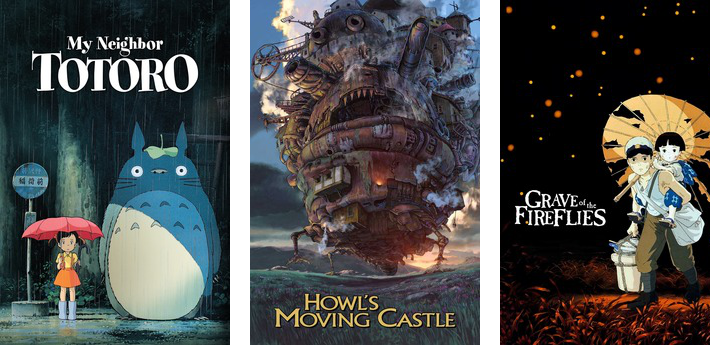

In [29]:
# Filtrare i film "Who Framed Roger Rabbit" e "Akira"
totoro = movies[movies['name'].str.contains("Totoro", case=False, na=False)]
howl = movies[movies['name'].str.contains("Howl's moving castle", case=False, na=False)]
grave_of_the_fireflies = movies[movies['name'].str.contains("Grave of the fireflies", case=False, na=False)]

# Unire i dati con il dataset dei poster
totoro = totoro.merge(posters[['id', 'link']], on='id', how='left')
howl = howl.merge(posters[['id', 'link']], on='id', how='left')
grave_of_the_fireflies = grave_of_the_fireflies.merge(posters[['id', 'link']], on='id', how='left')

# Scaricare le immagini
response1 = requests.get(totoro['link'].iloc[0])
response2 = requests.get(howl['link'].iloc[0])
response3 = requests.get(grave_of_the_fireflies['link'].iloc[0])

if response1.status_code == 200 and response2.status_code == 200 and response3.status_code == 200:
    img1 = Image.open(BytesIO(response1.content))  # Mantiene i colori originali
    img2 = Image.open(BytesIO(response2.content))
    img3 = Image.open(BytesIO(response3.content))

    # Creare un'immagine bianca di sfondo per unirle orizzontalmente
    target_height = min(img1.height, img2.height, img3.height)
    combined_width = img1.width + img2.width + img3.width + 20
    combined_image = Image.new("RGB", (combined_width, target_height), (255, 255, 255))

    # Incollare le immagini affiancate
    combined_image.paste(img1, (0, 0))
    combined_image.paste(img2, (img1.width+20, 0))
    combined_image.paste(img3, (img1.width+20 + img2.width+20, 0))

    # Mostrare l'immagine combinata
    display(combined_image)

else:
    print("Errore nel caricamento di una o entrambe le immagini.")


Punteggio medio complessivo dei migliori 10 film dello Studio Ghibli: 7.95


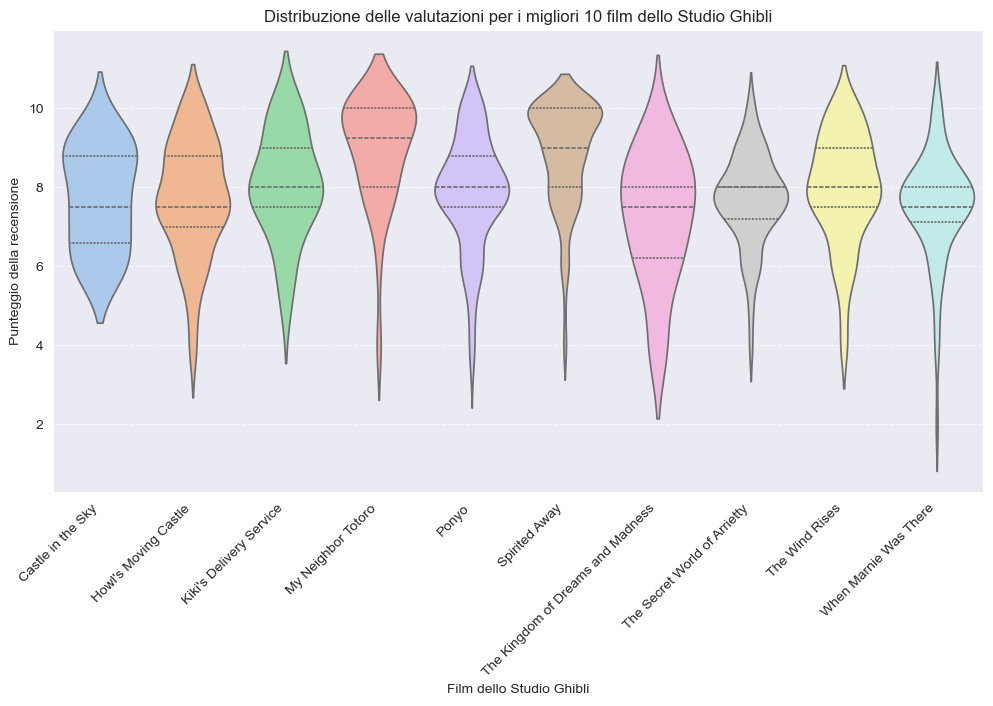

In [31]:
# Unire i dataset per identificare i film dello Studio Ghibli
movies_studios = pd.merge(movies, studios, on="id", how="left")
studio_ghibli_movies = movies_studios[movies_studios["studio"].str.contains("Ghibli", case=False, na=False)]

# Calcolare il punteggio medio delle recensioni per ogni film
ghibli_reviews = rotten_tomatoes[rotten_tomatoes["movie_title"].isin(studio_ghibli_movies["name"])]
avg_scores = ghibli_reviews.groupby("movie_title")["review_score"].mean().reset_index()

# Selezionare i migliori 10 film in base al punteggio medio
best_ghibli_movies = avg_scores.sort_values(by="review_score", ascending=False).head(10)

# Filtrare le recensioni solo per i migliori 10 film
ghibli_reviews = ghibli_reviews[ghibli_reviews["movie_title"].isin(best_ghibli_movies["movie_title"])]

# Calcolare la media complessiva dei punteggi dei migliori 10 film
overall_avg_score = best_ghibli_movies["review_score"].mean()

# Stampare la media complessiva
print(f"Punteggio medio complessivo dei migliori 10 film dello Studio Ghibli: {overall_avg_score:.2f}")

# Creazione del violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=ghibli_reviews, x="movie_title", y="review_score", hue="movie_title", palette="pastel", inner="quartile", legend=False)
plt.ylabel("Punteggio della recensione")
plt.xlabel("Film dello Studio Ghibli")
plt.title("Distribuzione delle valutazioni per i migliori 10 film dello Studio Ghibli")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.show()


Tornando a noi, a seguito di ingiustizie nei suoi confronti, Katzenberg viene licenziato. Non è stato un unicum nella storia della Disney: precedentemente anche Spielberg e Geffen erano stati costretti a lasciare le redini della regia per conto della grande casa di animazione californiana. A differenza degli ultimi due però, Katzenberg aveva un piano: fonda richiamando gli altri la Dreamworks, mettendosi alla ricerca di storie che potessero soppiantare il dominio della Disney. 

Partirono proprio da film che sicuramente il gigante non avrebbe prodotto: vediamo quali sono le prime produzioni della Dreamworks e i temi dei film che hanno portato una piccola casa emergente a sopraffare la Disney, in quello che possiamo definire come il moderno scontro tra Davide e Golia. 

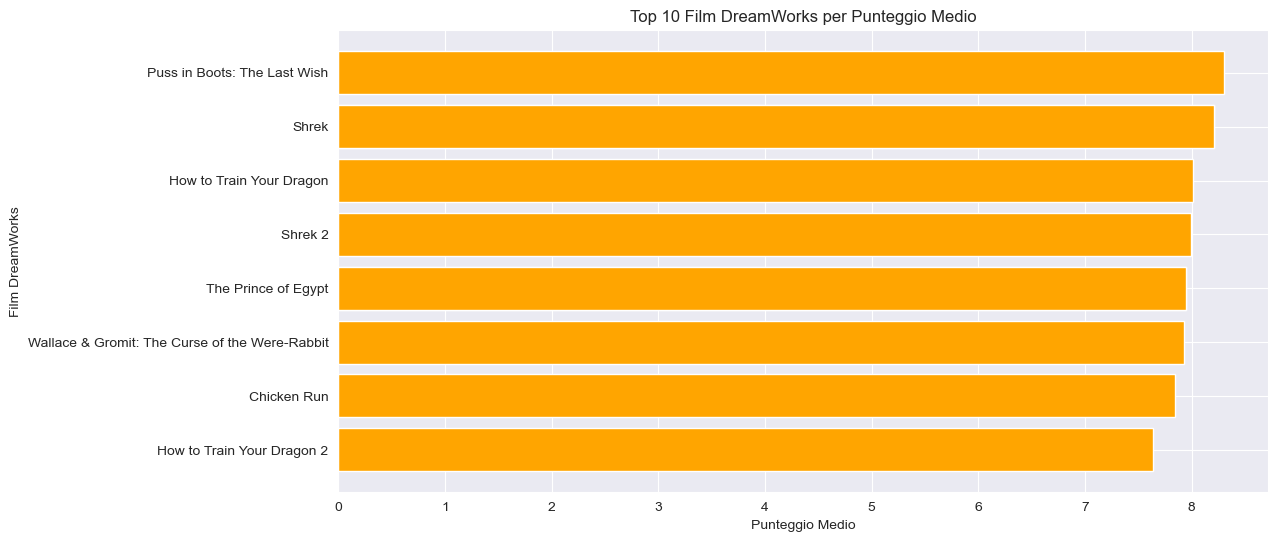

In [33]:
# Filtrare i film di animazione
animation_movies = movies.merge(genres[genres['genre'].str.contains("Animation", case=False, na=False)], on='id')

# Filtrare solo i film della DreamWorks
dreamworks_movies = animation_movies.merge(studios[studios['studio'].str.contains("Dreamworks", case=False, na=False)], on='id')

# Calcolare il punteggio medio su Rotten Tomatoes
rt_scores = rotten_tomatoes.groupby('movie_title')['review_score'].mean().reset_index()
rt_scores.rename(columns={'review_score': 'rt_avg_score'}, inplace=True)

# Unire i punteggi con i film DreamWorks
dreamworks_movies = dreamworks_movies.merge(rt_scores, left_on='name', right_on='movie_title', how='left')

# Calcolare la media tra il voto del film e il punteggio medio di Rotten Tomatoes
dreamworks_movies['combined_score'] = dreamworks_movies[['rating', 'rt_avg_score']].mean(axis=1, skipna=True)

# Ordinare per punteggio e mostrare i migliori
best_dreamworks_movies = dreamworks_movies[['name', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

# Creare il grafico dei migliori film DreamWorks
plt.figure(figsize=(12, 6))
plt.barh(best_dreamworks_movies['name'], best_dreamworks_movies['combined_score'], color='orange')
plt.xlabel("Punteggio Medio")
plt.ylabel("Film DreamWorks")
plt.title("Top 10 Film DreamWorks per Punteggio Medio")
plt.gca().invert_yaxis()
plt.show()


Questi sono i dati dello scontro dalla data della prima creazione della Dreamworks: in poco più di 2 anni le uscite della Dreamworks si piazzano agli Oscar al pari del grosso competitor californiano, è un risultato incredibile. La cosa ancor più sconvolgente resta però la premiazione del 2002: venne creato infatti un nuovo Oscar solamente per premiare Shrek, campione di incassi e cavallo di battaglia della neofita casa di produzione.

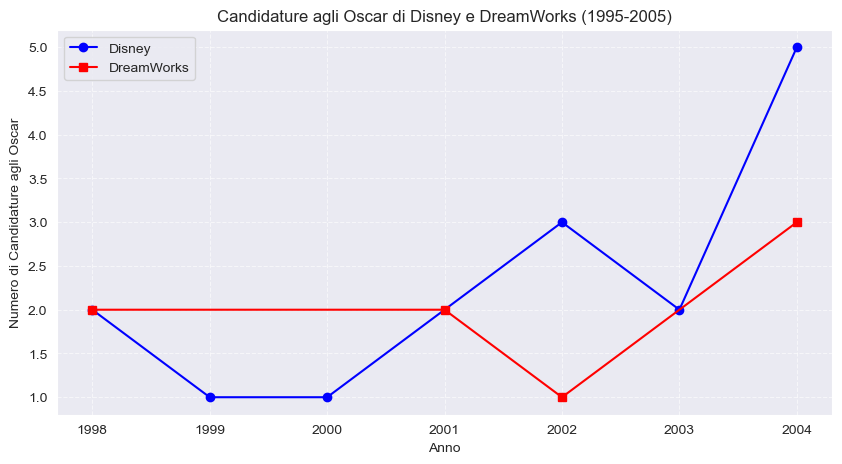

In [34]:
# Filtrare i film di animazione
animation_movies = movies.merge(genres[genres['genre'].str.contains("Animation", case=False, na=False)], on='id')

# Unire i dataset per identificare i film Disney e DreamWorks
movies_studios = pd.merge(animation_movies, studios, on="id", how="left")
movies_studios["studio"] = movies_studios["studio"].apply(lambda x: "Disney" if "disney" in str(x).lower() else ("DreamWorks" if "dreamworks" in str(x).lower() else x))

disney_movies = movies_studios[movies_studios["studio"] == "Disney"]
dreamworks_movies = movies_studios[movies_studios["studio"] == "DreamWorks"]

# Filtrare i film Disney e DreamWorks candidati agli Oscar tra il 1995 e il 2005
disney_oscar_awards = oscar_awards[(oscar_awards["film"].isin(disney_movies["name"])) & (oscar_awards["year_film"].between(1998, 2005))]
dreamworks_oscar_awards = oscar_awards[(oscar_awards["film"].isin(dreamworks_movies["name"])) & (oscar_awards["year_film"].between(1998, 2005))]

# Contare le candidature per anno
oscar_counts_disney = disney_oscar_awards.groupby("year_film").size()
oscar_counts_dreamworks = dreamworks_oscar_awards.groupby("year_film").size()

# Creazione del grafico
plt.figure(figsize=(10, 5))
plt.plot(oscar_counts_disney.index, oscar_counts_disney.values, marker='o', linestyle='-', color='blue', label="Disney")
plt.plot(oscar_counts_dreamworks.index, oscar_counts_dreamworks.values, marker='s', linestyle='-', color='red', label="DreamWorks")

plt.xlabel("Anno")
plt.ylabel("Numero di Candidature agli Oscar")
plt.title("Candidature agli Oscar di Disney e DreamWorks (1995-2005)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Il vero motivo per cui Shrek ottenne così tanto successo fu il tentativo di invertire la tendenza lanciata dai film della Disney: l'eroe non era il cavaliere senza macchia e senza paura cui il pubblico era stato abituato, ma tutt'altro. Era uno di noi, un personaggio sporco, testardo e con mille difetti, ma in cui risulta molto più semplice riconoscersi. Allo stesso modo Fiona: le principesse non erano mai state pensate nel modo in cui alla fine si presenta lei, che vive un mondo in cui per essere accettati bisogna necessariamente essere belli, mentre il brutto va rinchiuso. Siamo così al suo personaggio: chiuso di notte perchè raccapricciante e principessa di di giorno senza volerlo essere, obbligata a non amare Shrek perchè così deciso per lei. Forse è una figura più vicina a quello che è il mondo reale, ma la cosa che fa pensare ancora di più è sicuramente che ad oggi la Disney non ha ancora mai inserito una principessa "normalizzata" come la nostra principessa orco.

### Conclusione

Si conclude così la nostra storia: analizzando i dati di alcune delle più grandi case di animazione del mondo abbiamo trovato due esempi (due dei tanti nei diversi settori) di come tante volte non siamo noi ad essere sbagliati, ma è il contesto in cui ci troviamo ad essere quello inappropriato per il nostro percorso: è necessario dunque sapersi reinventare come Jobs e Spielberg per poter tirar fuori qualcosa che potrebbe cambiare le vite di chi ci sta intorno, che sia con un device o con un sorriso.